<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/%ED%95%9C%EC%98%81%EB%B2%88%EC%97%AD%EA%B8%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl

#from konlpy.tag import Mecab

import time
import re
import os
import io


In [9]:
#!sudo apt -qq -y install fonts-nanum

In [10]:
'''
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
'''

"\n%config InlineBackend.figure_format = 'retina'\n \nimport matplotlib.font_manager as fm\nfontpath = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'\nfont = fm.FontProperties(fname=fontpath, size=10)\nplt.rc('font', family='NanumBarunGothic') \nmpl.font_manager._rebuild()\n"

In [11]:
#%% 데이터 준비하기
path_to_file_ko = './korean-english-park.train.ko'
path_to_file_en = './korean-english-park.train.en'

eng_df = pd.read_fwf(path_to_file_en, header=None)
kor_df = pd.read_fwf(path_to_file_ko, header=None)

print(eng_df.head())
print(kor_df.head())

                                                   0    1    2    3
0  Much of personal computing is about "can you t...  NaN  NaN  NaN
1  so a mention a few weeks ago about a rechargea...  NaN  NaN  NaN
2  Like all optical mice, But it also doesn't nee...  NaN  NaN  NaN
3  uses gyroscopic sensors to control the cursor ...  NaN  NaN  NaN
4  Intelligence officials have revealed a spate o...  NaN  NaN  NaN
                                                   0    1    2    3    4
0               개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"  NaN  NaN  NaN  NaN
1  모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...  NaN  NaN  NaN  NaN
2                         그러나 이것은 또한 책상도 필요로 하지 않는다.  NaN  NaN  NaN  NaN
3  79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...  NaN  NaN  NaN  NaN
4  정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...  NaN  NaN  NaN  NaN


In [12]:
#%% 데이터확인

print(eng_df.info())
print(kor_df.info())

eng_df.isna().sum()
kor_df.isna().sum()

print(eng_df[0])
print(kor_df[0])

print(eng_df.head())
print(kor_df.head())

kor_ndf = kor_df[0]
eng_ndf = eng_df[0]

print(kor_ndf.head())
kor_eng_corpos = pd.concat([kor_ndf,eng_ndf],axis=1,ignore_index=True)
print(kor_eng_corpos.head())


print(kor_eng_corpos.shape)
#print(kor_eng_corpos[0][0])  #한글
#print(kor_eng_corpos[1][0])  #영문
#print(list(kor_eng_corpos.values))

kor_eng_corpos.isna().sum()

kor_eng_corpos.dropna(inplace=True)

kor_eng_corpos.info()

kor_eng_corpos.drop_duplicates(inplace=True)
kor_eng_corpos.info()

korlist = kor_eng_corpos[0].tolist()
englist = kor_eng_corpos[1].tolist()

#print(korlist[:5])
#print(englist[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
 1   1       3989 non-null   object
 2   2       3317 non-null   object
 3   3       2951 non-null   object
dtypes: object(4)
memory usage: 2.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
 1   1       738 non-null    object
 2   2       607 non-null    object
 3   3       498 non-null    object
 4   4       363 non-null    object
dtypes: object(5)
memory usage: 3.6+ MB
None
0        Much of personal computing is about "can you t...
1        so a mention a few weeks ago about a rechargea...
2        Like all optical mice, But it also doesn't nee...
3        uses gyroscopic sensors to control the c

77564
문장의 최단 길이:  1
문장의 최장 길이:  145
문장의 평균길이: 63.78251836838105


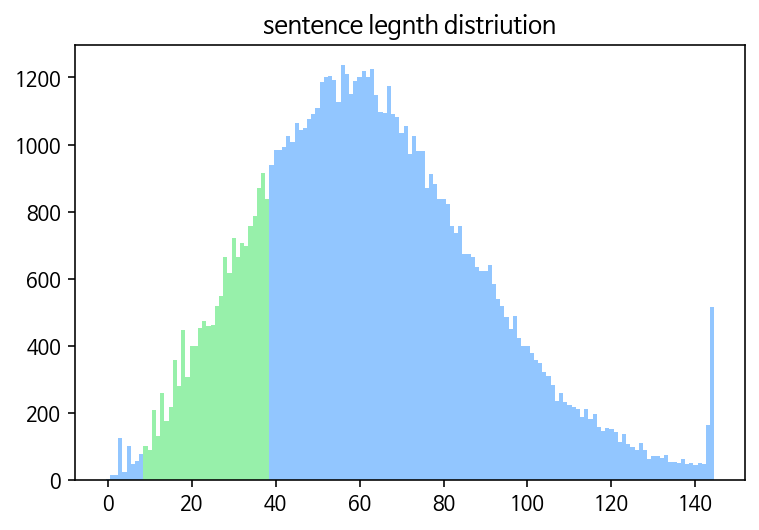

In [13]:
#%%한국어 데이터 그래프로 확인

min_len = 999
max_len = 0
sum_len = 0


print(len(set(korlist)))

for sen in korlist:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이: ",min_len)
print("문장의 최장 길이: ",max_len)
print("문장의 평균길이:", sum_len/len(korlist))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in korlist:
  sentence_length[len(sen)-1] += 1  # 길이의 빈도수 

plt.bar(range(max_len), sentence_length,width=1.0)
plt.title("Sentence legnth distroutin")



max_len = 40
min_len = 10

korlist = [s for s in korlist if (len(s)< max_len)& (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in korlist:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)

plt.title("sentence legnth distriution")
plt.show()

75597
문장의 최단 길이:  1
문장의 최장 길이:  243
문장의 평균길이: 196.06594882189003


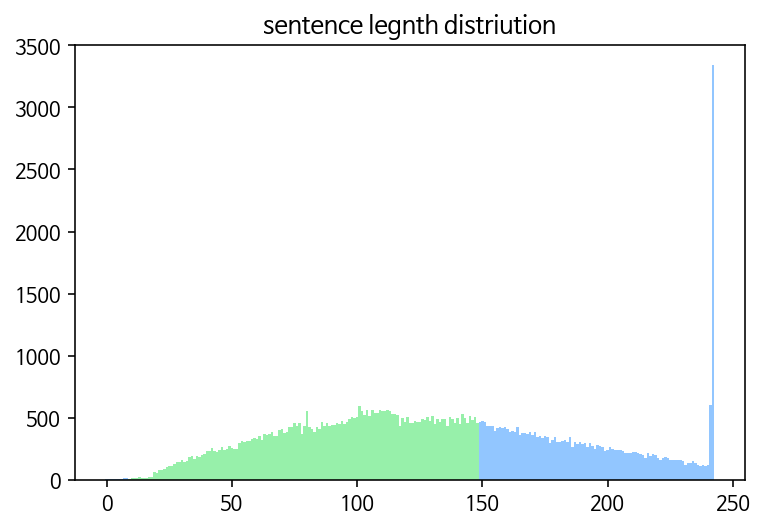

14514
49716


In [14]:
#%%영어 데이터 그래프로 확인


print(len(set(englist)))

for sen in englist:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이: ",min_len)
print("문장의 최장 길이: ",max_len)
print("문장의 평균길이:", sum_len/len(englist))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in englist:
  sentence_length[len(sen)-1] += 1  # 길이의 빈도수 

plt.bar(range(max_len), sentence_length,width=1.0)
plt.title("Sentence legnth distroutin")



max_len = 150
min_len = 10

englist = [s for s in englist if (len(s)< max_len)& (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in englist:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)

plt.title("sentence legnth distriution")
plt.show()

print(len(korlist))
print(len(englist))

In [15]:
#%% 데이타 전처리 

def preprocess_sentence(sentence, s_token=False, e_token=False, mode='kor'):
    
    if mode == 'eng':
      sentence = sentence.lower().strip()
      
      sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
      sentence = re.sub(r'[" "]+', " ", sentence)
      sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
      sentence = sentence.strip()

    if mode == 'kor':
      sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
      sentence = re.sub(r'[" "]+', " ", sentence)
      sentence = re.sub(r"[^ㄱ-ㅎ가-힣?.!,]", " ", sentence)
      sentence = sentence.strip()
    
# 수정 ###############################################
    #if s_token:
    #    sentence = '<start> ' + sentence

    #if e_token:
    #    sentence += ' <end>'
#######################################################
    
    sentence =  '<start> ' + sentence + ' <end>'
    return sentence


num_examples = 500

eng_corpus = []

for line in englist[:num_examples]: 
   eng_corpus.append(preprocess_sentence(line, s_token=True, e_token=True,mode='eng'))

print("English :", eng_corpus[499])
print("English :", eng_corpus[0])

print(len(eng_corpus))



kor_corpus = []

for line in korlist[:num_examples]: 
   kor_corpus.append(preprocess_sentence(line))

print("Korean :", kor_corpus[499])
print("Korean :", kor_corpus[0])

print(len(kor_corpus))

English : <start> if the bacteria is not killed and it becomes resistant , it can leave the individual and go to somebody else . <end>
English : <start> much of personal computing is about can you top this ? <end>
500
Korean : <start> 이 로봇을 작업대와 혼동하는 사람이 있을 지도 모른다 . <end>
Korean : <start> 개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ? <end>
500


In [16]:
#%% 토큰화
'''
!pip install konlpy

from konlpy.tag import Mecab 
mecab = Mecab('C:/Mecab/mecab-ko-dic')
text = u"""Colab에서 Mecab-ko-dic을 쉽게 설치할 수 있는 도와주는 쉘스크립트이빈다."""
my_morphs = mecab.morphs(text)

print(my_morphs)
'''

def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
  return tensor, tokenizer

'''
# 공백 기반 토큰화 <-> [형태소 기반 토큰화 ] 
def mecab_split(sentence):

  return mecab.morphs(sentence)

mecab_corpus = []

for kor in kor_corpus:
    mecab_corpus.append(mecab_split(kor))

print("한글 corpus->",len(mecab_corpus))
'''
############################################################### 한글토큰화
kor_split_tensor, kor_split_tokenizer = tokenize(kor_corpus) # 형태소 분석한다음 토큰화
################################################################

print(kor_corpus[:5])


# TOKENIZER
########################################################################
#kor_split_tensor, kor_split_tokenizer = tokenize(split_corpus)
########################################################################
print(len(kor_split_tokenizer.index_word))

for idx, word in enumerate(kor_split_tokenizer.word_index):

  print(idx,":",word)

  if idx > 10 : break

print(list(enumerate(kor_split_tokenizer.word_index))[0:5])
print(list(enumerate(kor_split_tokenizer.index_word))[0:5])

print(kor_split_tensor[100])

texts = kor_split_tokenizer.sequences_to_texts([kor_split_tensor[100]])

print(texts)

################################# filtered corpus eng -> tokenize ###################
print(len(eng_corpus))

eng_tensor, eng_tokenizer = tokenize(eng_corpus)

print(eng_tokenizer.sequences_to_texts([eng_tensor[100]]))
####################################################################################

sentence = " "

for w in kor_split_tensor[100]:
   if w == 0: continue 
   sentence += kor_split_tokenizer.index_word[w] + " "

print(sentence)

#%% 데이터분리
######################################################################################
# 그리고 변환된 텐서를 80%의 훈련데이터와 20% 검증데이터로 분리하세요
# 단 Tokenizer의 단어수는 자유롭게 진행하세요!
# encoding -> 한글 decoding -> 영어
enc_train, enc_val, dec_train, dec_val = train_test_split(kor_split_tensor,eng_tensor , test_size = 0.2)


print(enc_train.shape)
print(enc_val.shape)
print(dec_train.shape)
print(dec_val.shape)

print('Korean Vocab Size :',len(kor_split_tokenizer.index_word))
print('English Vocab Size :',len(eng_tokenizer.index_word))

['<start> 개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ? <end>', '<start> 그러나 이것은 또한 책상도 필요로 하지 않는다 . <end>', '<start> 많은 인질들이 화학 가스의 영향으로 고통을 겪으며 병원으로 옮겨졌다 . <end>', '<start> 여명의 사망자가 예상되는 베트남 빌딩 화재 <end>', '<start> 그와 동시 에 노동 비용은 더욱 상승하고 있습니다 . 라고 말했다 . <end>']
2290
0 : <start>
1 : <end>
2 : .
3 : 있다
4 : ,
5 : 것이다
6 : ?
7 : 그
8 : 수
9 : 이
10 : 있는
11 : 그러나
[(0, '<start>'), (1, '<end>'), (2, '.'), (3, '있다'), (4, ',')]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[  1  86  44 766 767 768  45 769 255   3   2   0   0   0   0]
['<start> 그들이 아주 몸집이 크고 강인해야 할 필요는 없습니다 . <end>']
500
['<start> officials have wrestled for months over what to do with the mir , which moscow can no longer afford to maintain . <end>']
 <start> 그들이 아주 몸집이 크고 강인해야 할 필요는 없습니다 . <end> 
(400, 15)
(100, 15)
(400, 36)
(100, 36)
Korean Vocab Size : 2290
English Vocab Size : 2399


In [17]:

############################################# modeling
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.w_dec = tf.keras.layers.Dense(units)
    self.w_enc = tf.keras.layers.Dense(units)
    self.w_com = tf.keras.layers.Dense(1)

  def call(self, h_enc, h_dec):
   # print("[H_encoder] Shape :", h_enc.shape)
    # h_enc shape : [batch x length x units]
    # h_dec shape : [batch x units]

    h_enc = self.w_enc(h_enc) # h_enc -> w_enc -> Dense
    #print("[W_encoder X H_encoder] Shape:", h_enc.shape)

    #print("\n[H_decoder] Shape: ", h_dec.shape)
    h_dec = tf.expand_dims(h_dec, 1)
    h_dec = self.w_dec(h_dec)

    #print("[W_decoder X H_decoder] Shape:", h_dec.shape)

    score = self.w_com(tf.nn.tanh(h_dec + h_enc))
    #print("[Score_alignment]Shape :", score.shape)

    attn = tf.nn.softmax(score, axis =1)
    #print("\n최종 weight : \n", attn.numpy())

    context_vec = attn * h_enc
    context_vec = tf.reduce_sum(context_vec, axis=1)
    return context_vec, attn

W_size = 100

#print("Hidden State를 {0}차원으로 Mapping\n".format(W_size))

attention = BahdanauAttention(W_size)

enc_state = tf.random.uniform((1, 10, 512))
dec_state = tf.random.uniform((1, 512))

_ = attention(enc_state, dec_state) # call을 부른다

In [18]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()
    # todo
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)

  def call(self, x):
    # todo 
    out = self.embedding(x)
    out = self.gru(out)

    return out

class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    ## Todo
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
    self.fc = tf.keras.layers.Dense(vocab_size)
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, h_dec, enc_out):
    ## Todo
    context_vec, attn = self.attention(enc_out, h_dec)
    
    out = self.embedding(x)
    out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)

    out, h_dec = self.gru(out)
    #print("out.shape->",out.shape)
    out = tf.reshape(out, (-1, out.shape[2]))
    out = self.fc(out)

    return out, h_dec, attn

BATCH_SIZE = 64
src_vocab_size = len(kor_split_tokenizer.index_word) + 1
tgt_vocab_size = len(eng_tokenizer.index_word) + 1

units = 1024
embedding_dim = 512

#[H_encoder] Shape : (1, 10, 512)

# 52279 , 512, 1024
encoder = Encoder(src_vocab_size, embedding_dim, units)
decoder = Decoder(tgt_vocab_size, embedding_dim, units)

# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))  # 64, 10
sample_output = encoder(sample_enc)

print('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))
sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)), sample_state, sample_output)

print('Decoder output :', sample_logits.shape)
print('Decoder Hidden State :', h_dec.shape)
print('Attention :', attn.shape)

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
# Categorical Crossentropy()
# [0.1, 0.2, 0.7] --> onehot encoding [0, 0, 1]
# SparseCategoricalCrossentropy()
# [0.1, 0.2, 0.7] ---> 정수 인덱스 2
# True --> 모델의 출력값을 그대로 전달

Encoder Output: (64, 30, 1024)
Decoder output : (64, 2400)
Decoder Hidden State : (64, 1024)
Attention : (64, 30, 1)


In [19]:

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  return tf.reduce_mean(loss)

#%%
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
  bsz = src.shape[0]
  loss = 0

  with tf.GradientTape() as tape:
    enc_out = encoder(src)
    h_dec = enc_out[:, -1]

    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
      pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

      loss += loss_function(tgt[:, t], pred)
      dec_src = tf.expand_dims(tgt[:,t], 1)

  batch_loss = (loss/int(tgt.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))
  return batch_loss
#%%

In [20]:

from tqdm import tqdm
import random

epochs = 10

#print(enc_train[:5])
for epoch in range(epochs):
  total_loss = 0
  
  idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
  #print(idx_list[:5])
  random.shuffle(idx_list)
  t = tqdm(idx_list)
  #print(list(t)[:5])

  for (batch, idx) in enumerate(t):
    batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                            dec_train[idx:idx+BATCH_SIZE],
                            encoder,
                            decoder,
                            optimizer,
                            eng_tokenizer)
    total_loss += batch_loss

    t.set_description_str('Epoch %2d' % (epoch+1))
    t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch+1)))

#print(eng_tokenizer.word_index['<start>'])

Epoch 10: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s, Loss 2.4860]


In [21]:
#%%
@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    
    print("bsz->", bsz)
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss

In [22]:
#%%

# Training Process

from tqdm import tqdm

EPOCHS = 10


for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                eng_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
    
    test_loss = 0
    
    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)


    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    eng_tokenizer)
    
        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))

  0%|          | 0/2 [00:00<?, ?it/s]

bsz-> 64


Test Epoch  1:  50%|█████     | 1/2 [00:13<00:13, 13.91s/it, Test Loss 3.1402]

bsz-> 36


Test Epoch 10: 100%|██████████| 2/2 [00:00<00:00,  4.83it/s, Test Loss 3.9152]


In [23]:
'''
import matplotlib as mpl
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
'''

"\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt\n\n\n%config InlineBackend.figure_format = 'retina'\n \nimport matplotlib.font_manager as fm\nfontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'\nfont = fm.FontProperties(fname=fontpath, size=10)\nplt.rc('font', family='NanumBarunGothic') \nmpl.font_manager._rebuild()\n"

개인용 컴퓨터 사용의 상당부분은 이것보다 뛰어날 수 있느냐
enc_out-> tf.Tensor(
[[[-0.00577291 -0.00226828  0.00702798 ... -0.00277872  0.00194671
   -0.01249901]
  [ 0.00604215 -0.02142305  0.00876698 ... -0.01642376  0.02809782
   -0.00350604]
  [ 0.0040093  -0.02831799  0.01453312 ... -0.00640876  0.01734241
   -0.00071935]
  ...
  [ 0.07068352 -0.10232046 -0.01453488 ...  0.01183752  0.04804406
    0.00056125]
  [ 0.07665563 -0.10141226 -0.01221235 ...  0.01652693  0.04811571
    0.00065043]
  [ 0.08105896 -0.10058563 -0.0103741  ...  0.02025972  0.04822794
    0.00078602]]], shape=(1, 15, 1024), dtype=float32)
Input: 개인용 컴퓨터 사용의 상당부분은 이것보다 뛰어날 수 있느냐
Predicted translation: the united states and the united states and the united states and the united states and the united states and the united states and the united states and the united states and the united states and 


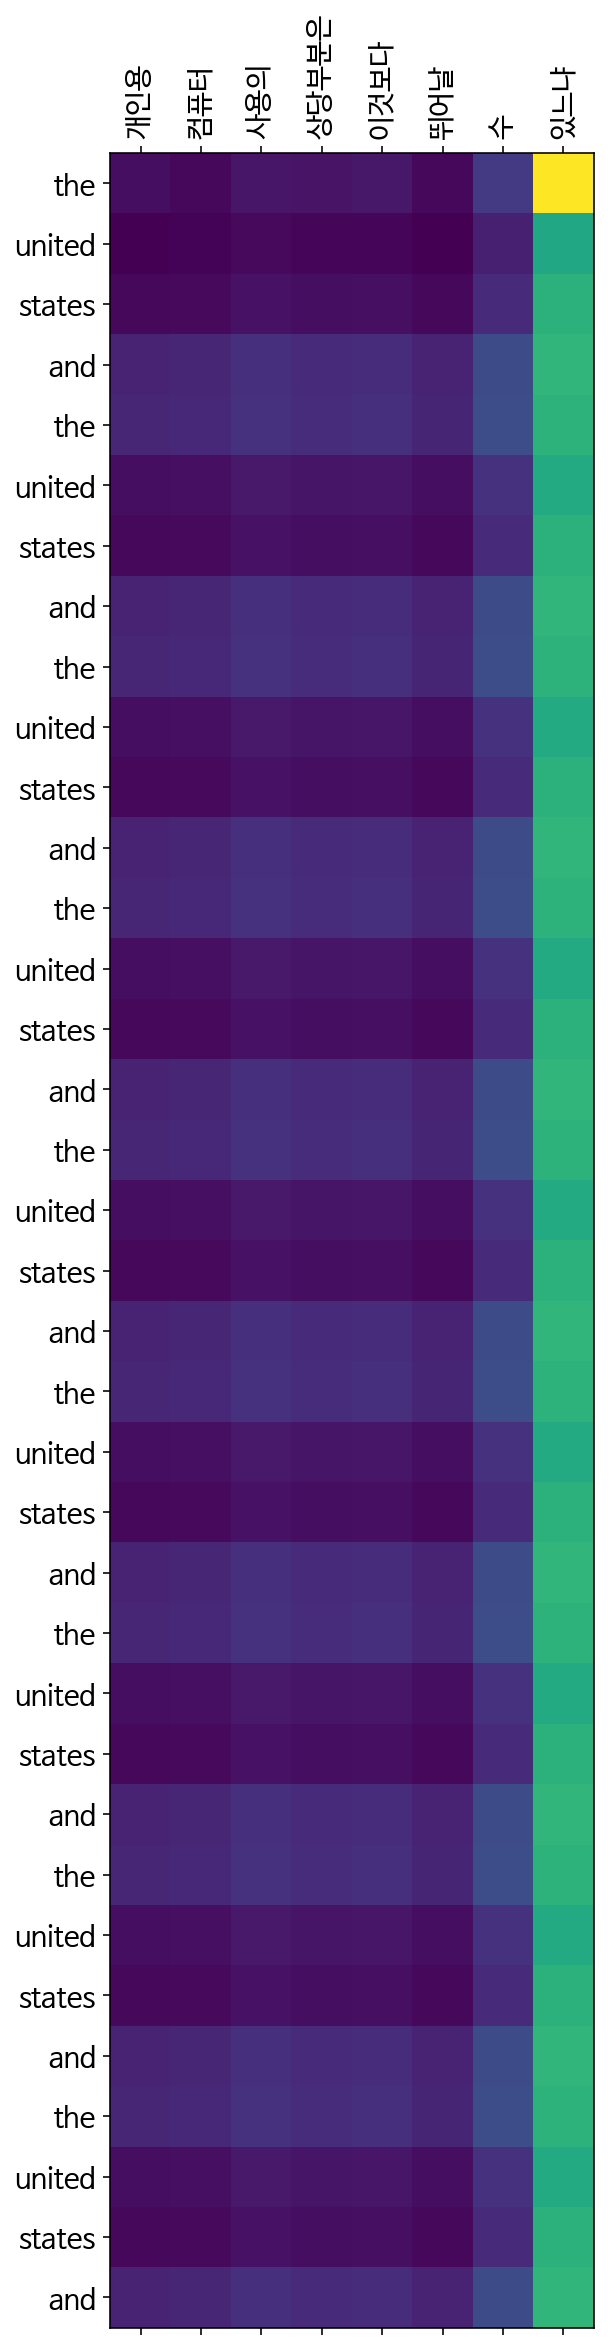

'\n(400, 11)\n(100, 11)\n(400, 61)\n(100, 61)\n'

(400, 15)
(100, 15)
(400, 36)
(100, 36)


In [24]:
#%%

def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    # dec_train -> 61   enc_train -> 11
    #print(attention) #(61 x 11)
    #sentence = preprocess_sentence(sentence)   
    inputs = kor_split_tokenizer.texts_to_sequences([sentence.split()])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)
    print("enc_out->",enc_out)
    
    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([eng_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += eng_tokenizer.index_word[predicted_id] + ' '

        if eng_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(5,20))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    print(sentence)
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))


translate('개인용 컴퓨터 사용의 상당부분은 이것보다 뛰어날 수 있느냐',encoder,decoder)



#enc_train, enc_val, dec_train, dec_val = train_test_split(kor_split_tensor,eng_tensor , test_size = 0.2)

print(enc_train.shape)
print(enc_val.shape)
print(dec_train.shape)
print(dec_val.shape)

'''
(400, 11)
(100, 11)
(400, 61)
(100, 61)
'''

그러나 이것은 또한 책상도 필요로 하지 않는다.
enc_out-> tf.Tensor(
[[[-1.0010751e-02 -5.4062051e-03 -1.2270801e-02 ... -8.8417698e-03
   -3.5014302e-03  3.4238824e-03]
  [ 8.8006826e-03 -4.7210868e-02 -2.1610407e-02 ... -8.3682354e-04
    3.4632087e-02  1.1611924e-02]
  [ 1.8248707e-02 -5.1613137e-02 -2.9446244e-02 ... -6.2076487e-03
    2.4283066e-02 -4.9048685e-03]
  ...
  [ 9.0313889e-02 -9.7598970e-02 -6.6983355e-03 ...  2.9100578e-02
    4.6817552e-02 -1.8109080e-03]
  [ 9.1440454e-02 -9.7640172e-02 -5.9704897e-03 ...  3.0080289e-02
    4.7623977e-02 -7.6599797e-04]
  [ 9.2181556e-02 -9.7631425e-02 -5.4387394e-03 ...  3.0808294e-02
    4.8187334e-02 -4.0683623e-05]]], shape=(1, 15, 1024), dtype=float32)
Input: 그러나 이것은 또한 책상도 필요로 하지 않는다.
Predicted translation: why the united states and rural tests in the united states and rural tests in the united states and rural tests in the united states and rural tests in the united states and rural tests in 


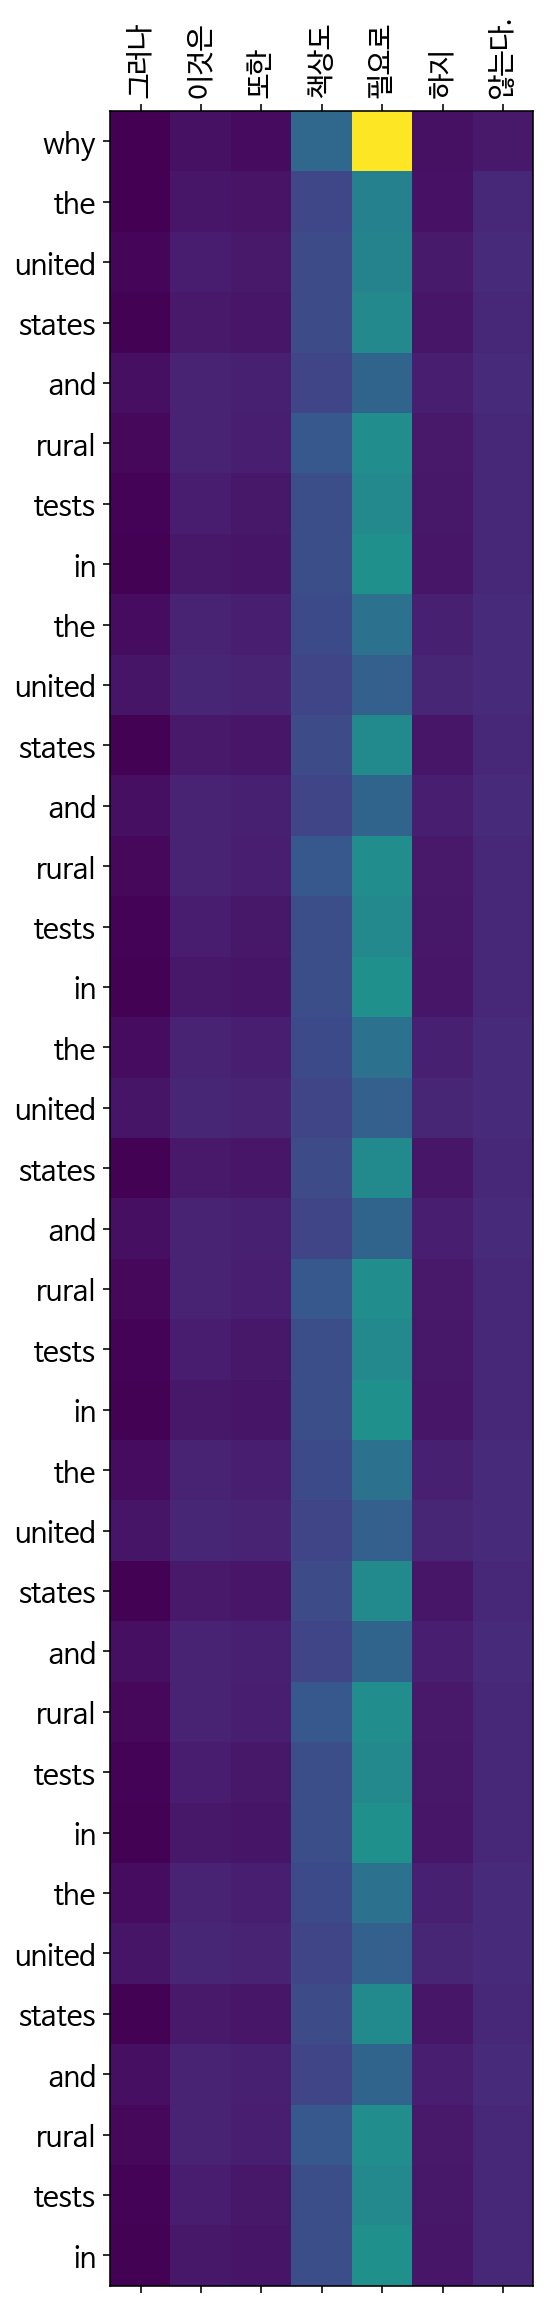

In [35]:
translate('그러나 이것은 또한 책상도 필요로 하지 않는다.',encoder,decoder)

# 한글코드 문제 때문에 어려움이 있었음

In [25]:
'''
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
'''

'\nimport numpy as np\n\ndata = np.random.randint(-200, 100, 50).cumsum()\ndata\n'

In [26]:
#!sudo apt -qq -y install fonts-nanum

In [27]:
#import matplotlib as mpl
#import matplotlib.pyplot as plt

In [28]:
'''
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
'''

"\n%config InlineBackend.figure_format = 'retina'\n \nimport matplotlib.font_manager as fm\nfontpath = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'\n#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'\nfont = fm.FontProperties(fname=fontpath, size=10)\nplt.rc('font', family='NanumBarunGothic') \nmpl.font_manager._rebuild()\n"

In [29]:
'''
import matplotlib as mpl
import matplotlib.pyplot as plt


# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')

plt.xlabel('시간(분)')
'''

"\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt\n\n\n# 한글을 넣어놓고 그러보면 깨진다\nplt.figure(figsize=(10,8))\nplt.plot(range(50), data, 'r')\nplt.title('시간별 가격추이')\nplt.ylabel('주식가격')\n\nplt.xlabel('시간(분)')\n"

In [30]:
#!apt-get update -qq
#!apt-get install fonts-nanum* -qq

In [31]:
'''
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
'''

'\nsys_font=fm.findSystemFonts()\nprint(f"sys_font number: {len(sys_font)}")\n\nnanum_font = [f for f in sys_font if \'Nanum\' in f]\nprint(f"nanum_font number: {len(nanum_font)}")\n'

In [32]:
#nanum_font

In [33]:
'''
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()
'''

'\n# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자\n!python --version\ndef current_font():\n  print(f"설정 폰트 글꼴: {plt.rcParams[\'font.family\']}, 설정 폰트 사이즈: {plt.rcParams[\'font.size\']}")  # 파이썬 3.6 이상 사용가능하다\n        \ncurrent_font()\n'

In [34]:
'''
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()
'''

"\nplt.plot(range(50), data, 'r')\nplt.title('시간별 가격 추이')\nplt.ylabel('주식 가격')\nplt.xlabel('시간(분)')\nplt.style.use('seaborn-pastel')\nplt.show()\n"